Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
# Display first 5 records of training data

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Display first 5 records of testing data

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Display info from training data (such as null values and dtype)

df_train.info()
print('')
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [ ]:
# Display info from testing data (such as null values and dtype)

df_test.info()
print('')
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

(1459, 80)

Handling missing values

In [ ]:
# Columns with missing values in df_train
missing_cols_train = df_train.columns[df_train.isnull().any()].tolist()
print("Columns with missing values in df_train:", missing_cols_train)

# Columns with missing values in df_test
missing_cols_test = df_test.columns[df_test.isnull().any()].tolist()
print("Columns with missing values in df_test:", missing_cols_test)

Columns with missing values in df_train: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Columns with missing values in df_test: ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [ ]:
# Replace missing values

# replace_none = Compile variables to replace missing values with value 'None'
replace_none = ['MSZoning','Utilities', 'MasVnrType']

for col in replace_none:
    df_train[col].fillna('None', inplace=True)
    df_test[col].fillna('None', inplace=True)


# replace_na = Compile variables to replace missing values with value 'NA'
replace_na = ['Alley','Exterior1st', 'Exterior2nd','BsmtQual',
              'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual',
              'GarageCond', 'PoolQC', 'Fence','MiscFeature']

for col in replace_na:
    df_train[col].fillna('NA', inplace=True)
    df_test[col].fillna('NA', inplace=True)


# replace_random = Compile variables to replace missing values with random imputation
replace_random = ['Electrical', 'KitchenQual', 'Functional']

for col in replace_random:
    random_sample = df_train[col].dropna().sample(df_train[col].isnull().sum(), random_state=0)
    random_sample.index = df_train[df_train[col].isnull()].index
    df_train.loc[df_train[col].isnull(), col] = random_sample

    random_sample = df_test[col].dropna().sample(df_test[col].isnull().sum(), random_state=0)
    random_sample.index = df_test[df_test[col].isnull()].index
    df_test.loc[df_test[col].isnull(), col] = random_sample


# replace_mode = Compile variables to replace missing values with mode imputation
replace_mode = ['SaleType']

for col in replace_mode:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)


# replace_median = Compile variables to replace missing values with median imputation
replace_median = ['LotFrontage','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
                  'GarageYrBlt', 'GarageCars', 'GarageArea']

for col in replace_median:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

# replace_zero = Compile variables to replace missing values with 0
replace_zero = ['BsmtUnfSF']

for col in replace_zero:
    df_train[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Combine 'BsmtFullBath' and 'BsmtHalfBath' into new column 'TotalBsmtBath', and do median imputation
df_train['TotalBsmtBath'] = df_train['BsmtFullBath'] + df_train['BsmtHalfBath'] * 0.5
df_test['TotalBsmtBath'] = df_test['BsmtFullBath'] + df_test['BsmtHalfBath'] * 0.5

df_train['TotalBsmtBath'].fillna(df_train['TotalBsmtBath'].median(), inplace=True)
df_test['TotalBsmtBath'].fillna(df_test['TotalBsmtBath'].median(), inplace=True)

# Drop 'BsmtFullBath' and 'BsmtHalfBath' to avoid redundancies
df_train.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)
df_test.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [ ]:
# Drop column id
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [ ]:
# Statistical Analysis

df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBsmtBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.454110
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.514975
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,3.000000


In [ ]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBsmtBath
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.334476,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,439.142906,52.583276,...,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,0.466415
std,42.746880,20.569211,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.117812,176.698671,...,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,0.526626
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,3.000000


Univariate analysis

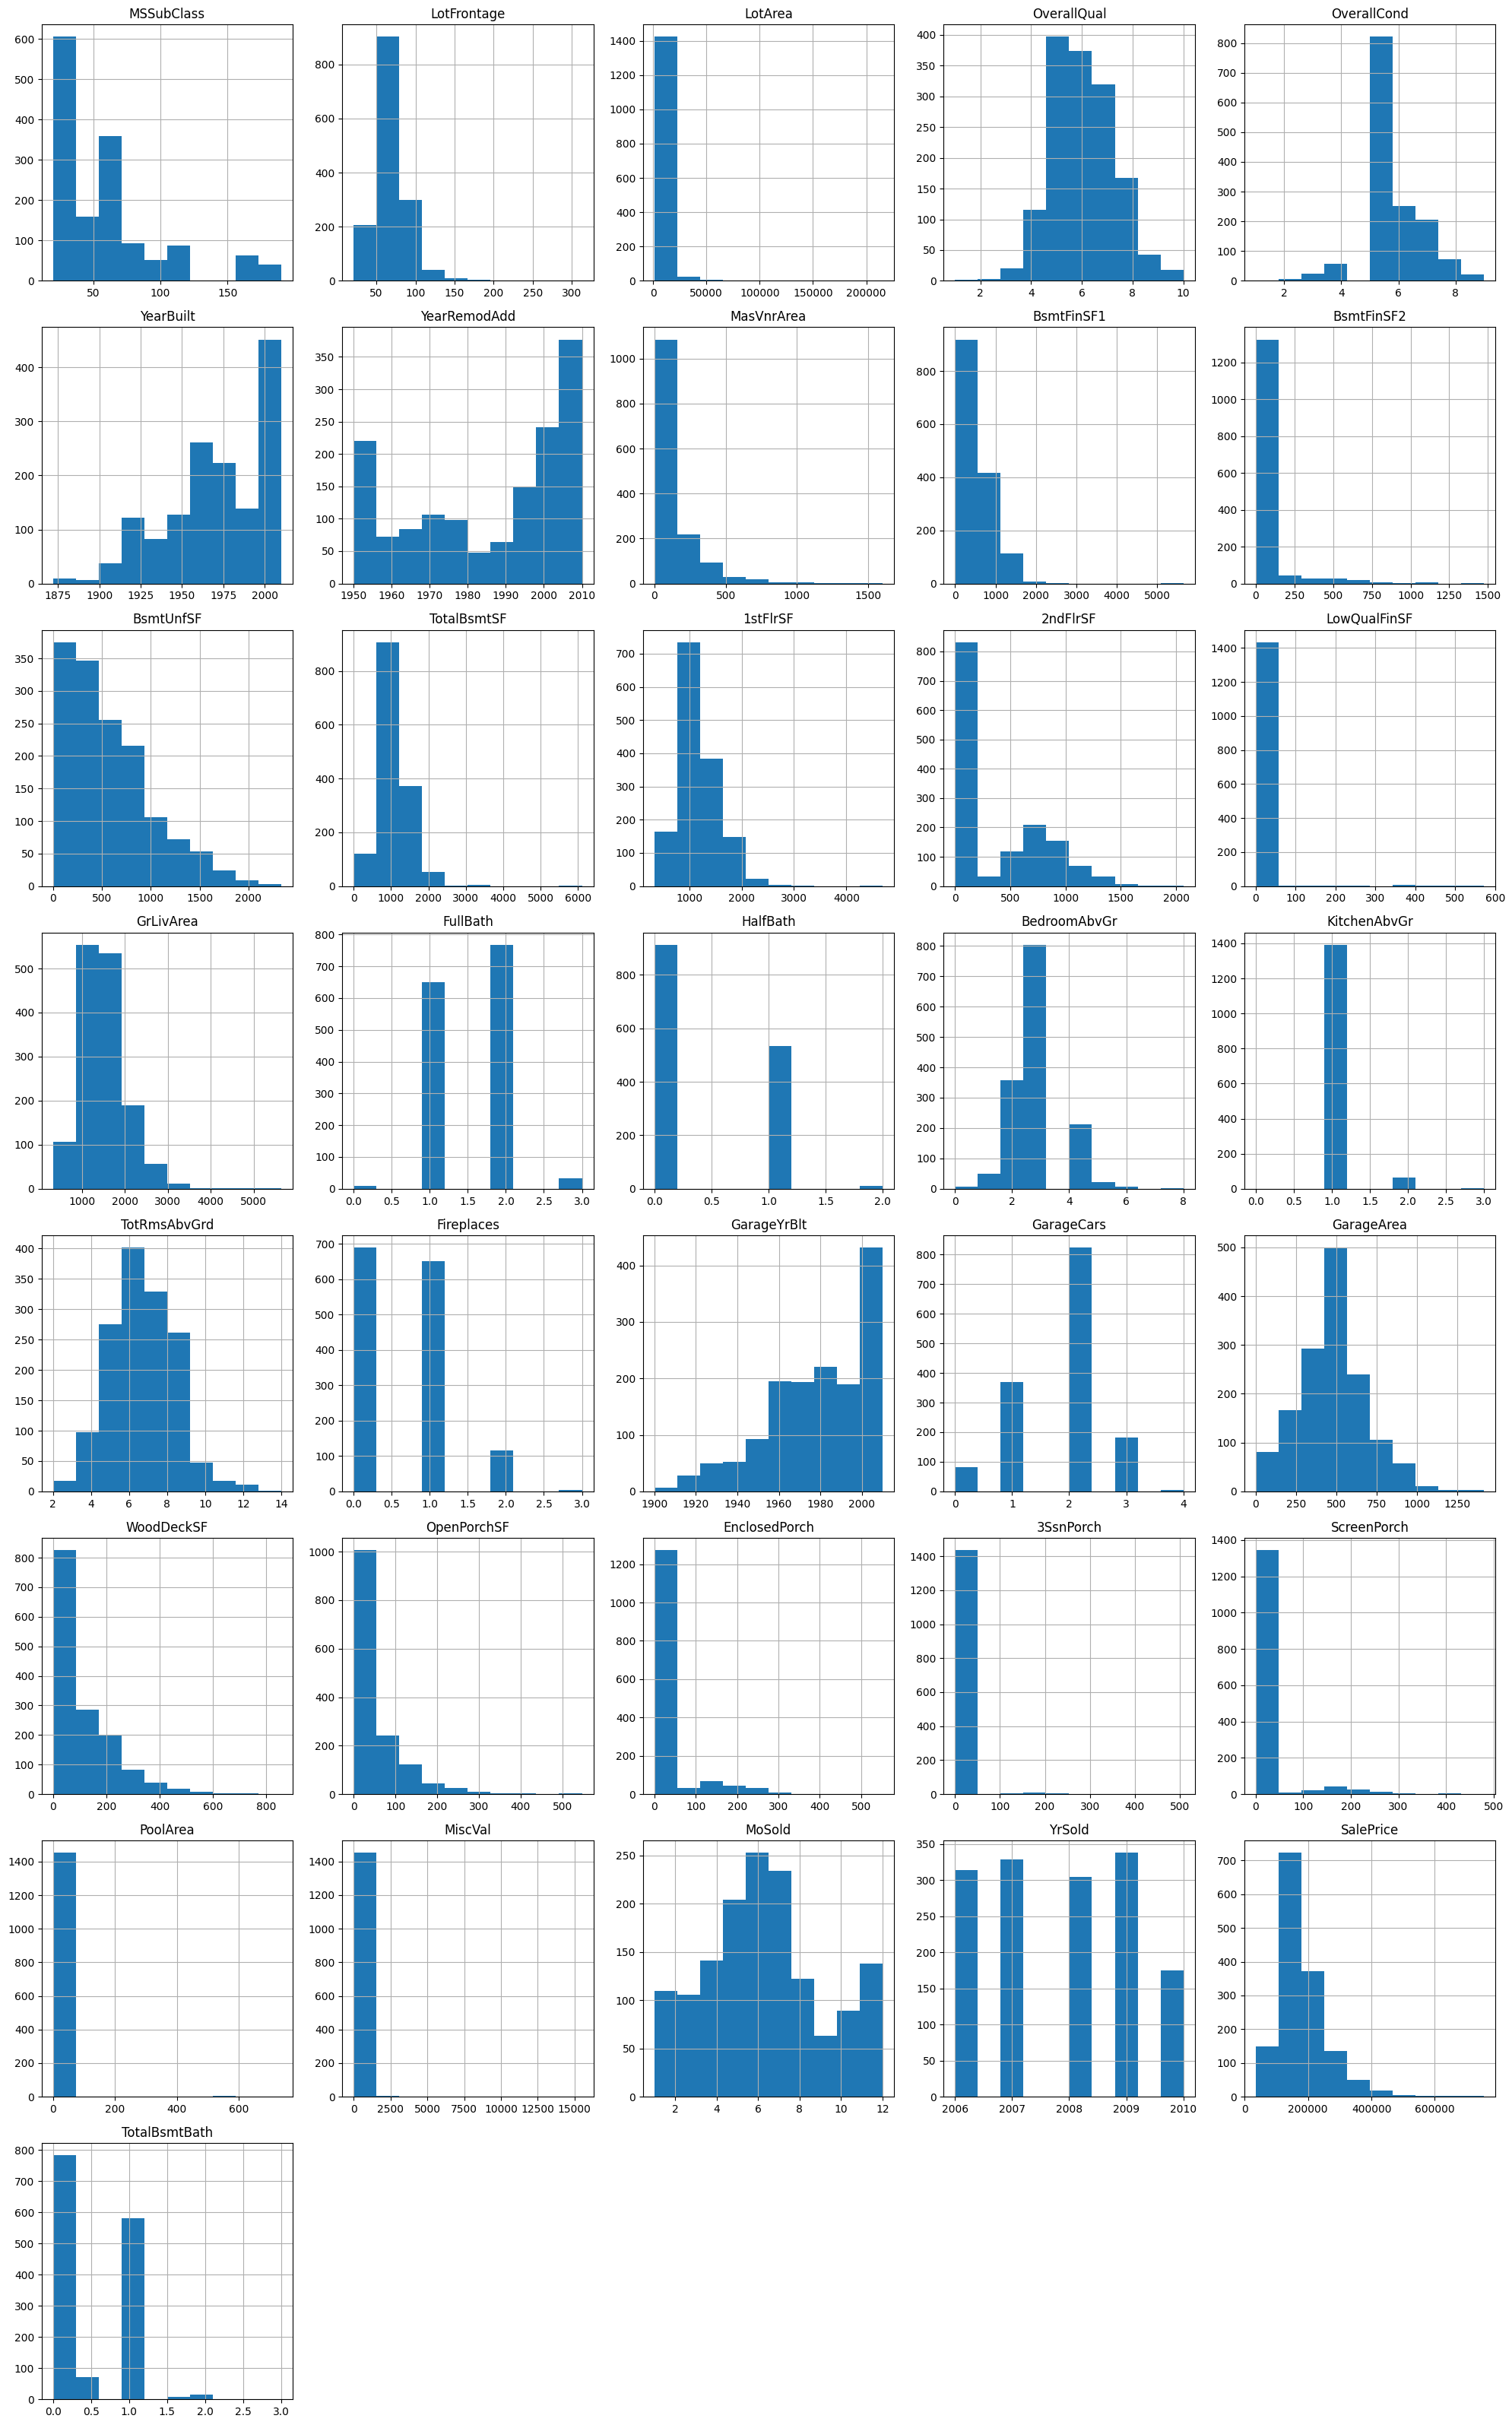

In [ ]:
num_cols = 5
num_rows = int(np.ceil(len(df_train.select_dtypes(include=['number']).columns) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(df_train.select_dtypes(include=['number']).columns):
    df_train[col].hist(ax=axes[i])
    axes[i].set_title(col)

for i in range(len(df_train.select_dtypes(include=['number']).columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Correlations

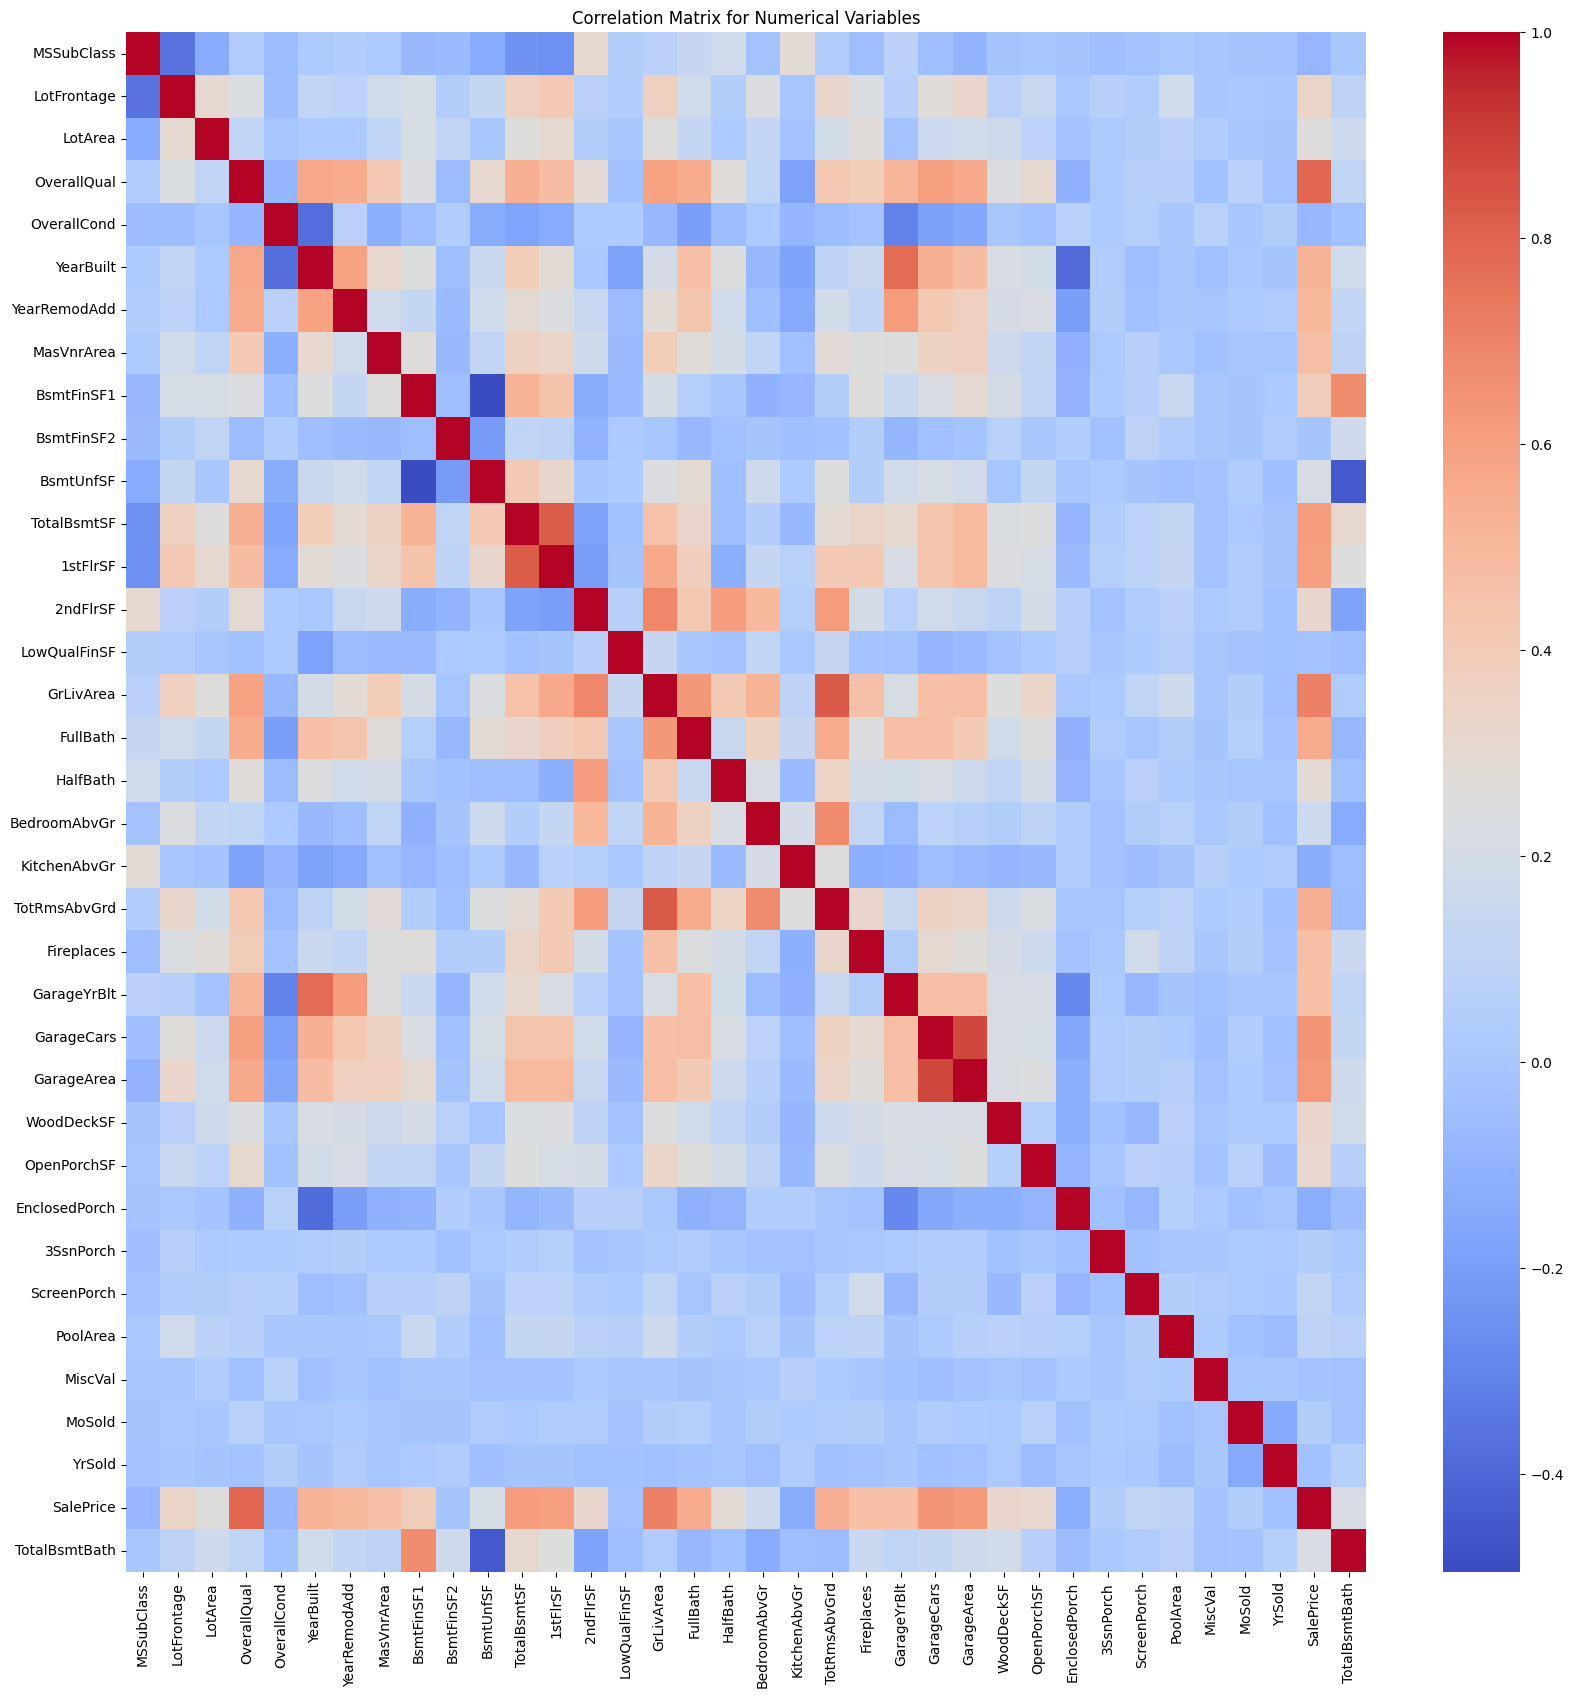

In [ ]:
# Select only numerical columns
numerical_df = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [ ]:
# Calculate correlations with the target variable ('SalePrice' is assumed here)
correlations = correlation_matrix.unstack().abs()
correlations = correlations[correlations != 1]

sorted_correlations = correlations.sort_values(ascending=False)
top_20_correlations = sorted_correlations.head(20)

print(top_20_correlations)

GarageCars     GarageArea       0.882475
GarageArea     GarageCars       0.882475
TotRmsAbvGrd   GrLivArea        0.825489
GrLivArea      TotRmsAbvGrd     0.825489
TotalBsmtSF    1stFlrSF         0.819530
1stFlrSF       TotalBsmtSF      0.819530
OverallQual    SalePrice        0.790982
SalePrice      OverallQual      0.790982
GarageYrBlt    YearBuilt        0.777182
YearBuilt      GarageYrBlt      0.777182
GrLivArea      SalePrice        0.708624
SalePrice      GrLivArea        0.708624
GrLivArea      2ndFlrSF         0.687501
2ndFlrSF       GrLivArea        0.687501
TotRmsAbvGrd   BedroomAbvGr     0.676620
BedroomAbvGr   TotRmsAbvGrd     0.676620
BsmtFinSF1     TotalBsmtBath    0.669802
TotalBsmtBath  BsmtFinSF1       0.669802
SalePrice      GarageCars       0.640409
GarageCars     SalePrice        0.640409
dtype: float64


Bivariate analysis

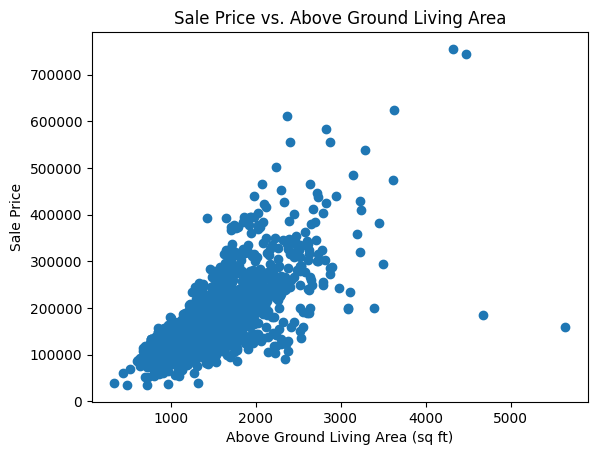

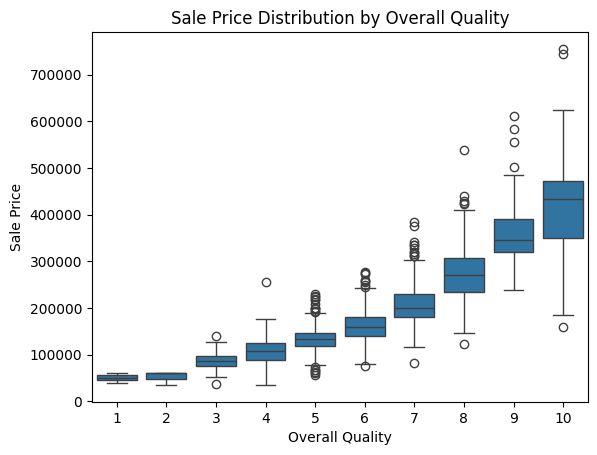

In [ ]:
# Scatter plots
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# Box plots
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

Feature Engineering

In [ ]:
# Feature Binning

# AgeSinceRemod = age since remodification
df_train['AgeSinceRemod'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['AgeSinceRemod'] = df_test['YrSold'] - df_test['YearRemodAdd']

# Binning
from sklearn.preprocessing import KBinsDiscretizer


bin_features = ['GarageYrBlt', 'YearBuilt', 'AgeSinceRemod']

kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

df_train[bin_features] = kbd.fit_transform(df_train[bin_features])
df_test[bin_features] = kbd.transform(df_test[bin_features])

In [ ]:
# Feature encoding for categorical variables
# One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Convert 'MSSubClass' and 'MoSold' to categorical
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

# Compile categorical columns for OHE
cat_cols = ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'GarageType', 'MiscFeature', 'SaleType', 'Street', 'LotShape', 'LandContour',
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'GarageYrBlt',
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'YearBuilt',
            'Heating', 'PavedDrive', 'SaleCondition', 'MSSubClass', 'MoSold', 'AgeSinceRemod']


# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = pd.DataFrame(ohe.fit_transform(df_train[cat_cols]))
encoded_train.columns = ohe.get_feature_names_out(cat_cols)

encoded_test = pd.DataFrame(ohe.transform(df_test[cat_cols]))
encoded_test.columns = ohe.get_feature_names_out(cat_cols)

df_train = pd.concat([df_train, encoded_train], axis=1)
df_test = pd.concat([df_test, encoded_test], axis=1)

# Drop original columns to avoid redundancies
df_train.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)

In [ ]:
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for each feature
quality_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
exposure_mapping = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
finish_mapping = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
functional_mapping = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
electrical_mapping = {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}
fence_mapping = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
overall_mapping = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}

# List of ordinal features and their corresponding mappings
ordinal_features = {
    'BsmtQual': quality_mapping,
    'BsmtCond': quality_mapping,
    'BsmtExposure': exposure_mapping,
    'BsmtFinType1': finish_mapping,
    'BsmtFinType2': finish_mapping,
    'KitchenQual': quality_mapping,
    'Functional': functional_mapping,
    'Electrical': electrical_mapping,
    'FireplaceQu': quality_mapping,
    'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual': quality_mapping,
    'GarageCond': quality_mapping,
    'PoolQC': quality_mapping,
    'Fence': fence_mapping,
    'ExterQual': quality_mapping,
    'ExterCond': quality_mapping,
    'HeatingQC': quality_mapping,
    'OverallQual': overall_mapping,
    'OverallCond': overall_mapping
}


ordinal_encoder = OrdinalEncoder(categories=[list(mapping.keys()) for mapping in ordinal_features.values()])
ordinal_cols = list(ordinal_features.keys())

df_train[ordinal_cols] = ordinal_encoder.fit_transform(df_train[ordinal_cols])
df_test[ordinal_cols] = ordinal_encoder.transform(df_test[ordinal_cols])

In [ ]:
# Binary Encoding

df_train['CentralAir'] = df_train['CentralAir'].map({'Y': 1, 'N': 0})
df_test['CentralAir'] = df_test['CentralAir'].map({'Y': 1, 'N': 0})

In [ ]:
# Feature Scaling for numerical variables
# Standardization

from sklearn.preprocessing import StandardScaler

# Compile numerical variables to standardize
std_features = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageCars', 'GarageArea', 'LotArea', '1stFlrSF',
                '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

scaler = StandardScaler()

df_train[std_features] = scaler.fit_transform(df_train[std_features])
df_test[std_features] = scaler.transform(df_test[std_features])

In [ ]:
print(len(df_train.columns))
print(len(df_test.columns))

266
265


Lasso Regression for Feature Selection

In [ ]:
# Lasso Regression for Feature Selection

from sklearn.linear_model import LassoCV

# Initialize LassoCV with cross-validation
lasso = LassoCV(cv=5)

# Fit the model
lasso.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Get the coefficients
lasso_coefficients = pd.DataFrame({'Feature': df_train.drop('SalePrice', axis=1).columns, 'Coefficient': lasso.coef_})

# Print non-zero coefficients sorted by magnitude
print(lasso_coefficients[lasso_coefficients['Coefficient'] != 0].sort_values('Coefficient', key=abs, ascending=False))

          Feature   Coefficient
2     OverallQual  18120.035210
23      GrLivArea  15766.373948
34     GarageCars   5259.526123
28    KitchenQual   4231.293347
5      MasVnrArea   3960.006981
10   BsmtExposure   3732.819570
16    TotalBsmtSF   3350.077869
20       1stFlrSF   3245.066990
32    FireplaceQu   2796.683630
29   TotRmsAbvGrd   2599.079275
12     BsmtFinSF1   2563.904022
35     GarageArea   2466.766679
1         LotArea   2439.037435
11   BsmtFinType1   2040.076034
6       ExterQual   1500.203536
4    YearRemodAdd    407.987932
42    ScreenPorch     58.844836
38     WoodDeckSF     40.115213
41      3SsnPorch     36.727045
39    OpenPorchSF     27.907382
40  EnclosedPorch    -11.698478
43       PoolArea     -9.011833
46        MiscVal     -0.245595


Random Forest for Feature Selection

In [ ]:
# Random Forest for Feature Selection

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor()

# Fit the model
rf.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Get feature importances
rf_importances = pd.DataFrame({'Feature': df_train.drop('SalePrice', axis=1).columns, 'Importance': rf.feature_importances_})

# Sort by importance in descending order
rf_importances.sort_values('Importance', ascending=False, inplace=True)

# Print the top importances (adjust the number as needed)
print(rf_importances.head(15))

         Feature  Importance
2    OverallQual    0.579409
23     GrLivArea    0.107783
16   TotalBsmtSF    0.042713
21      2ndFlrSF    0.035752
12    BsmtFinSF1    0.027468
34    GarageCars    0.023501
20      1stFlrSF    0.018589
1        LotArea    0.013774
35    GarageArea    0.012373
4   YearRemodAdd    0.010829
0    LotFrontage    0.008049
29  TotRmsAbvGrd    0.006570
28   KitchenQual    0.006023
8       BsmtQual    0.005569
15     BsmtUnfSF    0.005442


Recursive Feature Elimination (RFE) for Feature Selection

In [ ]:
# Recursive Feature Elimination (RFE) for Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Or choose another base model

# Initialize base model (here, we use linear regression)
estimator = LinearRegression()

# Initialize RFE with desired number of features to select
selector = RFE(estimator, n_features_to_select=10, step=1)  # Adjust n_features_to_select as needed

# Fit RFE to the data
selector = selector.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Get the selected features
selected_features = df_train.drop('SalePrice', axis=1).columns[selector.support_]

# Print the selected features
print(selected_features)

Index(['SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'BldgType_Duplex', 'MSSubClass_90'],
      dtype='object')


In [ ]:
# Cross-validation to check performance

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Get feature sets from previous steps
lasso_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist()
rf_features = rf_importances.head(10)['Feature'].tolist()  # Adjust number as needed
rfe_features = selected_features.tolist()

# Define models to evaluate
models = [
    ('Linear Regression (Lasso)', LinearRegression(), lasso_features),
    ('Random Forest', RandomForestRegressor(), rf_features),
    ('Recursive Feature Elimination (RFE)', LinearRegression(), rfe_features)
]

# Perform cross-validation and print results
for name, model, features in models:
    scores = cross_val_score(model, df_train[features], df_train['SalePrice'], cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name}:")
    print(f"RMSE scores: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean()}\n")

Linear Regression (Lasso):
RMSE scores: [27800.00413886 35437.34852418 36004.08766725 30829.47953455
 47606.29523294]
Mean RMSE: 35535.44301955612

Random Forest:
RMSE scores: [27578.37586056 35129.65125273 31187.42853243 25652.1326222
 31004.12055217]
Mean RMSE: 30110.341764018107

Recursive Feature Elimination (RFE):
RMSE scores: [69160.08323601 75393.4521649  79214.98717695 66687.99384426
 79979.91528022]
Mean RMSE: 74087.28634046853



In [ ]:
# Cross-validation evaluated with RMSE scores per fold and mean RMSE. The best is chosen from the lowest RMSE scores as it indicate better predictive accuracy.
# From the results above, Random Forest (RF) comes out with the lowest RMSE, with Lasso comes close while Recursive Feature Elimination (RFE) has a huge difference
# of RMSE scores compared to the other two feature selection models.
# So we will be focusing on tuning and evaluating Lasso and RF before finalizing feature selection.

Hyperparameter tuning

In [ ]:
# Finding the optimal hyperparameters

# Lasso
print("Best alpha:", lasso.alpha_)

# Random Forest
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Random Forest and RandomizedSearchCV
rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Fit the randomized search
random_search.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Print best parameters
print("")
print("Best parameters:", random_search.best_params_)

Best alpha: 3228.045976073372

Best parameters: {'n_estimators': 50, 'max_depth': 30}


In [ ]:
# Hyperparameter tuning

# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=3228.045976073372)
lasso.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

# Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=0)
rf.fit(df_train.drop('SalePrice', axis=1), df_train['SalePrice'])

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=0)

In [ ]:
# Cross-validation after hyperparameter tuning

models = [
    ('Linear Regression (Lasso)', LinearRegression(), lasso_features),
    ('Random Forest', RandomForestRegressor(), rf_features),
]

# Perform cross-validation and print results
for name, model, features in models:
    scores = cross_val_score(model, df_train[features], df_train['SalePrice'], cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name}:")
    print(f"RMSE scores: {rmse_scores}")
    print(f"Mean RMSE: {np.mean(rmse_scores)}")
    print("----")

Linear Regression (Lasso):
RMSE scores: [27800.00413886 35437.34852418 36004.08766725 30829.47953455
 47606.29523294]
Mean RMSE: 35535.44301955612
----
Random Forest:
RMSE scores: [27458.39530434 33763.27244753 29981.28652089 26140.41818559
 32049.82464892]
Mean RMSE: 29878.639421454387
----


In [ ]:
# Upon hyperparameter tuning, we can see the RMSE score from RF slightly decreased, while Lasso remains the same

In [ ]:
# Feature Selection with Lasso

selected_features_lasso = df_train.drop('SalePrice', axis=1).columns[lasso.coef_ != 0]
print("Selected features using Lasso:", selected_features_lasso)

Selected features using Lasso: Index(['LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


In [ ]:
# Feature Selection with Random Forest

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, prefit=True, threshold='median')
selected_features_rf = df_train.drop('SalePrice', axis=1).columns[selector.get_support()]
print("Selected features using Random Forest:", selected_features_rf)

Selected features using Random Forest: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'MoSold_12', 'MoSold_2', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7',
       'MoSold_8', 'MoSold_9', 'AgeSinceRemod_0.0', 'AgeSinceRemod_1.0'],
      dtype='object', length=133)


In [ ]:
# RF has the lowest RMSE score so we will choose RF as feature selection algorithm.

In [ ]:
# Next we will choose three regression models and compare their performance using RMSE, MSE and R-squared
# The best performance will be used to train testing data.
# The three models that we will use is Support Vector Machine (SVM), Random Forest (RF) and Gradient Boosting using XGBoost

Support Vector Machine (SVM)

In [ ]:
# Split training data into training and validation data

X = df_train.drop('SalePrice', axis=1)[selected_features_rf]
y = df_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Use model SVM and evaluate performance

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
model_svm = SVR()
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 7861795686.750051
Root Mean Squared Error: 88666.7676570543
R-squared: -0.024962364623230426


Random Forest (RF) Regression Model

In [ ]:
# Use model Random Forest and evaluate performance

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 819313623.7237401
Root Mean Squared Error: 28623.654967941115
R-squared: 0.8931839922328153


Gradient Boosting using XGBoost

In [ ]:
!pip install --upgrade xgboost

import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform

The results shown are as below (model - MSE, RMSE, R2)

- SVM - 7861795686.750051, 88666.7676570543, -0.024962364623230426

- With extremely high MSE and RMSE with negative R-squared (or R2), SVM is showing bad performance


- RF - 853880552.3863883, 29221.234614341472, 0.8886774135386447
- RF shows a good MSE and RMSE, with R2 of 0.889, makes it a very good performance


- XGBoost - 726032751.008849, 26944.994915732477, 0.9053452576334298
- XGBoost shows better scores compared RF means XGBoost has the best performance

Inspect feature importances

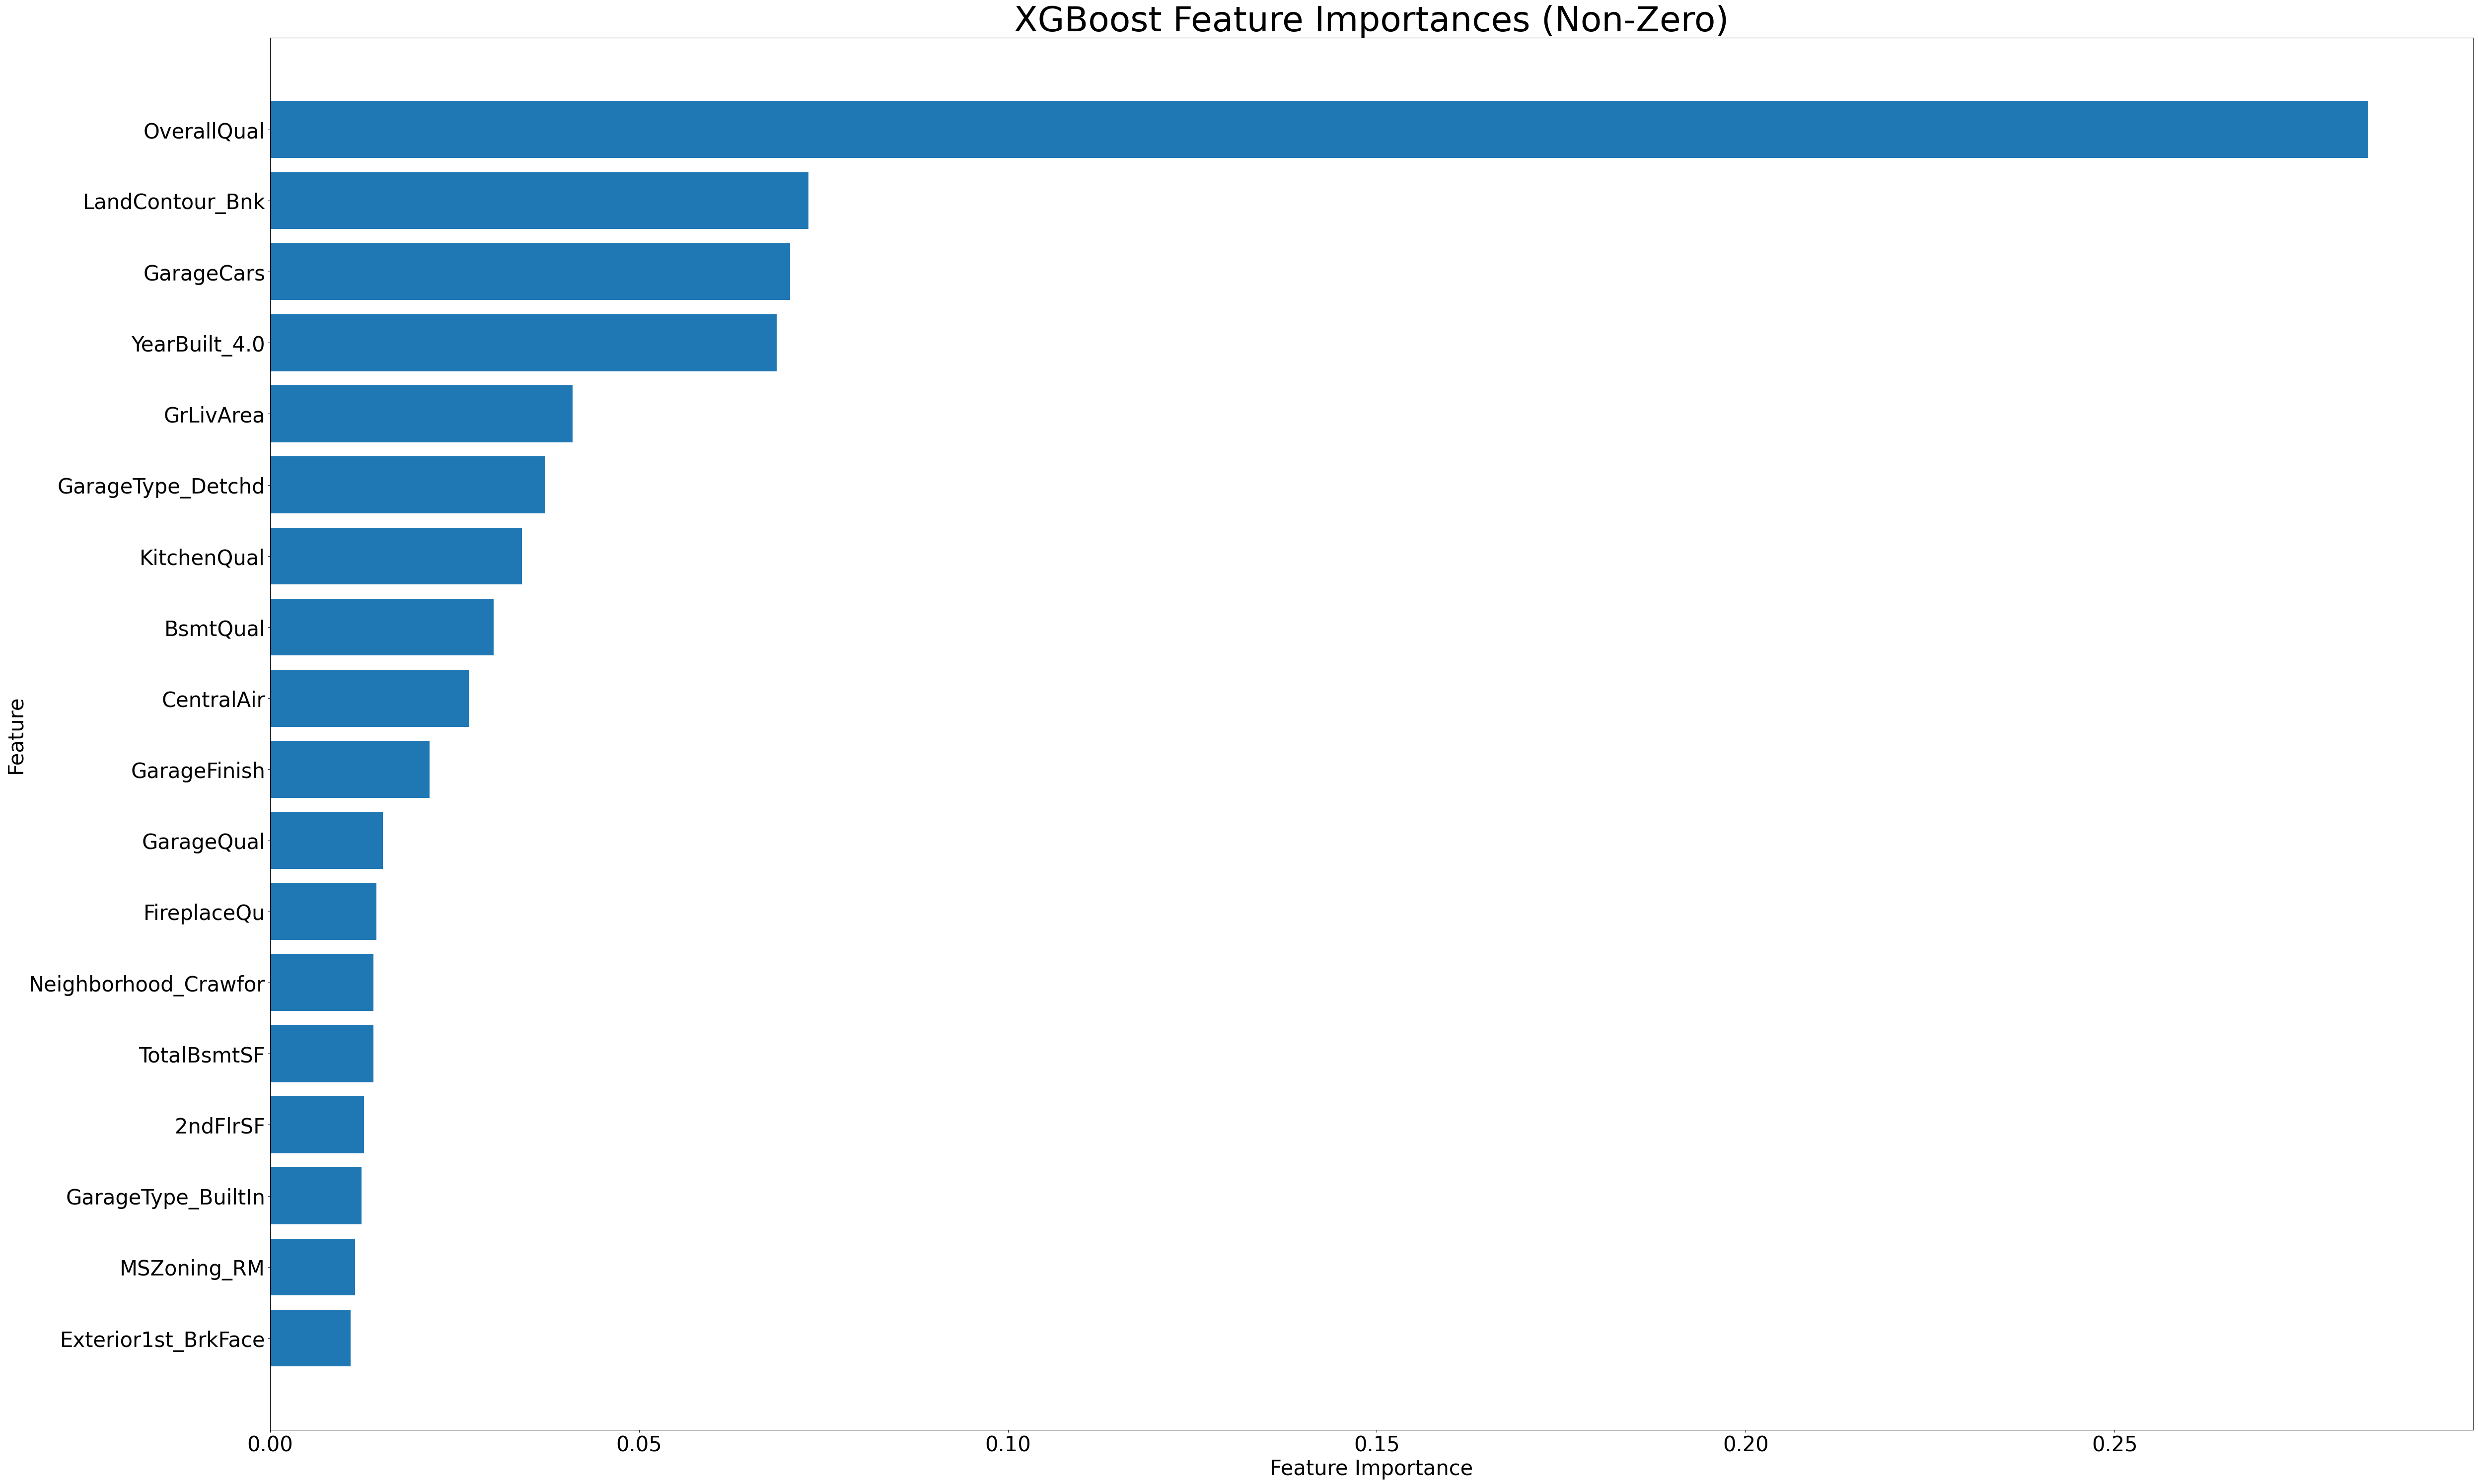

In [ ]:
# Inspect feature importances

importance = model_xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier manipulation
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Set importance threshold
threshold = 0.01

# Filter features based on threshold (with tolerance for precision)
important_features_df = importance_df[importance_df['Importance'] >= threshold]

# Sort by Importance in ascending order (least to most)
importance_df = important_features_df.sort_values('Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(50, 30))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance', fontsize=30)
plt.ylabel('Feature', fontsize=30)
plt.title('XGBoost Feature Importances (Non-Zero)', fontsize=50)

# Resize fonts on x-axis and y-axis
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()
plt.show()

Above is the plot that shows importance of each variables that contributes to the predictions. As initially there are a lot of variables, therefore threshold was set to 0.01. According to the plot, there are 18 features the has great significance to the model's prediction.

In [ ]:
# Train using only filtered features

import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Select important features for training and validation
X_train_selected = X_train[important_features_df['Feature']]
X_val_selected = X_val[important_features_df['Feature']]  # If you have a validation set

# Initialize XGBoost model
model_xgb_selected = xgb.XGBRegressor()

# Cross-validation using selected features
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed
scores = cross_val_score(model_xgb_selected, X_train_selected, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(model_xgb_selected, X_train_selected, y_train, cv=kf, scoring='r2')

# Evaluate performance
print("Performance after Feature Selection:")
print(f"Average MSE: {mse_scores.mean()}")
print(f"Average RMSE: {rmse_scores.mean()}")
print(f"Average R2: {r2_scores.mean()}")

Performance after Feature Selection:
Average MSE: 1080837753.4748406
Average RMSE: 32607.01030629241
Average R2: 0.8180027560393149


In [ ]:
# Comparison between filtered and unfiltered features

# Filtered
# 1080837753.4748406
# 32607.01030629241
# 0.8180027560393149

# Unfiltered
# 726032751.008849
# 26944.994915732477
# 0.9053452576334298

# The unfiltered shows better performance. Therefore we will do predictions on the testing data using the unfiltered features

In [ ]:
# Check missing cols in both dataset

X_test = df_test

missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)

print("Missing in Test:", missing_in_test)
print("Missing in Train:", missing_in_train)

Missing in Test: set()
Missing in Train: {'Neighborhood_BrkSide', 'Exterior1st_Stone', 'Neighborhood_NPkVill', 'MiscFeature_Shed', 'Street_Grvl', 'Condition1_PosA', 'AgeSinceRemod_3.0', 'Utilities_NoSeWa', 'SaleType_Oth', 'Exterior1st_CemntBd', 'MSSubClass_40', 'AgeSinceRemod_4.0', 'GarageType_CarPort', 'SaleCondition_AdjLand', 'GarageType_Basment', 'BldgType_2fmCon', 'Exterior1st_AsphShn', 'MiscFeature_Othr', 'MSSubClass_180', 'RoofMatl_Roll', 'Exterior2nd_AsphShn', 'Condition2_RRAe', 'Heating_Wall', 'Exterior2nd_BrkFace', 'SaleCondition_Alloca', 'MiscFeature_NA', 'Exterior2nd_Wd Shng', 'LotShape_IR3', 'Neighborhood_Blmngtn', 'Condition1_RRAn', 'HouseStyle_SLvl', 'GarageYrBlt_1.0', 'Heating_GasW', 'Exterior1st_BrkComm', 'Heating_OthW', 'YearBuilt_0.0', 'Exterior2nd_Other', 'RoofStyle_Shed', 'GarageYrBlt_0.0', 'MasVnrType_BrkCmn', 'BldgType_Duplex', 'SaleType_ConLI', 'HouseStyle_1.5Unf', 'Condition2_PosA', 'RoofMatl_ClyTile', 'MSSubClass_85', 'RoofMatl_WdShake', 'Exterior2nd_CBlock', '

In [ ]:
# Get the common columns
common_cols = list(set(X_train.columns) & set(X_test.columns))


# Select only the common columns from both datasets
X_train = X_train[common_cols]
X_test = X_test[common_cols]

In [ ]:
# Make predictions on the testing data

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Prepare submission to Kaggle

df_test_original = pd.read_csv('/content/test.csv')
submission = pd.DataFrame({'Id': df_test_original['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)